100


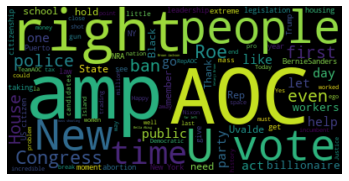

In [15]:
import os
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from os import path
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import requests
import json

#Input: 
username = "Censor"

#Dependencies
APIKEY = "M4WV85v7m2xFDVownYHXxZMTI"
API_SECRET = "BmaQmu4Tw0b2IFnHW9Vs43NZ8iqwIdrQpNypPp67KnEiJ9ih11"
BEARER = "AAAAAAAAAAAAAAAAAAAAAJEddAEAAAAAEzFi3yt567TOL1uM%2BeM7mFPgZwg%3Dl23TFu1cLN3DabEJlgulduCSEil2f0ax7FLM1N147TH21Xk4kO"

def get_url():
    usernames = f"usernames={username}"
    user_fields = "user.fields=id"
    url = "https://api.twitter.com/2/users/by?{}&{}".format(usernames, user_fields)
    return url

def getUserId():
    url = get_url()
    response = requests.request("GET", url, auth=bearer_oauth,)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    result = response.json()
    return result["data"][0]["id"]

def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """
    r.headers["Authorization"] = f"Bearer {BEARER}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

def getAllTweets(id):
    url = "https://api.twitter.com/2/users/{}/tweets".format(id)
    param = {"max_results":100}
    response = requests.get(url, auth=bearer_oauth,params=param)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    result = response.json()
    return result
    
userId = getUserId()
data = getAllTweets(userId)
text = []

for i in data["data"]:
    text.append(i["text"])
    
print(len(text))

# Goal #1
# Sentiment analysis on each person overall (n number of tweets in a day) 
# Contraint might be within a day n tweets.

#Goal #2
#show all most used words using WordCloud

stopwords = set(stopwords.words("english"))
stopwords.update(["br", "href", "https", "RT", "CO", "//"])

comments = " ".join( comments for comments in text)
cloud = WordCloud(stopwords=stopwords).generate(comments)

plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#print(comments)
